# CAP 5768 - Data Science - Dr. Marques - Fall 2019

Christian Garbin

## Assignment 5: Hypothesis Testing

## Starter code

### Goals 

- To learn how to test hypoteses using different test functions, compute p-values, and derive reasonable conclusions.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets.
- To increase our statistical analysis skills.

### Instructions

- This assignment is structured in 3 parts, each one using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 96 (sorry, no bonus points this time).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss

%matplotlib inline

### Formulating and simulating a hypothesis

In this assignment we will look at how to test hypotheses in a more systematic way than we have done so far, i.e., going from “apparent effects” to “rigorous hypothesis testing”.

The fundamental question we want to address is whether the effects we see in a sample are likely to appear in the larger population. 

Or, put differently, you will learn how to use classical hypothesis testing to answer the question:

**Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?**

#### Pipeline for hypothesis testing

* Clearly state the null hypothesis
* Define your test statistics 
* Generate many simulated data assuming that your null hypothesis is true 
* Compute the test statistic for each simulated data set
* The p-value is the fraction of your simulated data sets for which each test statistics is at least as extreme as for the real data


To get more predictable results:

In [2]:
np.random.seed(42)

-------------------
## Part 1: Computing and visualizing permutation samples

We will use the Sheffield Weather Station data (see https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/sheffielddata.txt if you're interested in the entire dataset), paying particular attention to the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays `rain_june` and `rain_november`, respectively.

The Python code below shows how to concatenate the two arrays, permute the concatenated array, and split the permuted array into two. It also shows how to plot the ECDF for the original arrays as well as the ECDF for a particular permutation.

In [3]:
# Relevant numpy arrays
rain_june = np.array(
    [
        66.2,
        39.7,
        76.4,
        26.5,
        11.2,
        61.8,
        6.1,
        48.4,
        89.2,
        104,
        34,
        60.6,
        57.1,
        79.1,
        90.9,
        32.3,
        63.8,
        78.2,
        27.5,
        43.4,
        30.1,
        17.3,
        77.5,
        44.9,
        92.2,
        39.6,
        79.4,
        66.1,
        53.5,
        98.5,
        20.8,
        55.5,
        39.6,
        56,
        65.1,
        14.8,
        13.2,
        88.1,
        8.4,
        32.1,
        19.6,
        40.4,
        2.2,
        77.5,
        105.4,
        77.2,
        38,
        27.1,
        111.8,
        17.2,
        26.7,
        23.3,
        77.2,
        87.2,
        27.7,
        50.6,
        60.3,
        15.1,
        6,
        29.4,
        39.3,
        56.3,
        80.4,
        85.3,
        68.4,
        72.5,
        13.3,
        28.4,
        14.7,
        37.4,
        49.5,
        57.2,
        85.9,
        82.1,
        31.8,
        126.6,
        30.7,
        41.4,
        33.9,
        13.5,
        99.1,
        70.2,
        91.8,
        61.3,
        13.7,
        54.9,
        62.5,
        24.2,
        69.4,
        83.1,
        44,
        48.5,
        11.9,
        16.6,
        66.4,
        90,
        34.9,
        132.8,
        33.4,
        225,
        7.6,
        40.9,
        76.5,
        48,
        140,
        55.9,
        54.1,
        46.4,
        68.6,
        52.2,
        108.3,
        14.6,
        11.3,
        29.8,
        130.9,
        152.4,
        61,
        46.6,
        43.9,
        30.9,
        111.1,
        68.5,
        42.2,
        9.8,
        285.6,
        56.7,
        168.2,
        41.2,
        47.8,
        166.6,
        37.8,
        45.4,
        43.2,
    ]
)

rain_november = np.array(
    [
        83.6,
        30.9,
        62.2,
        37,
        41,
        160.2,
        18.2,
        122.4,
        71.3,
        44.2,
        49.1,
        37.6,
        114.5,
        28.8,
        82.5,
        71.9,
        50.7,
        67.7,
        112,
        63.6,
        42.8,
        57.2,
        99.1,
        86.4,
        84.4,
        38.1,
        17.7,
        102.2,
        101.3,
        58,
        82,
        101.4,
        81.4,
        100.1,
        54.6,
        39.6,
        57.5,
        29.2,
        48.8,
        37.3,
        115.4,
        55.6,
        62,
        95,
        84.2,
        118.1,
        153.2,
        83.4,
        104.7,
        59,
        46.4,
        50,
        147.6,
        76.8,
        59.9,
        101.8,
        136.6,
        173,
        92.5,
        37,
        59.8,
        142.1,
        9.9,
        158.2,
        72.6,
        28,
        112.9,
        119.3,
        199.2,
        50.7,
        44,
        170.7,
        67.2,
        21.4,
        61.3,
        15.6,
        106,
        116.2,
        42.3,
        38.5,
        132.5,
        40.8,
        147.5,
        93.9,
        71.4,
        87.3,
        163.7,
        141.4,
        62.6,
        84.9,
        28.8,
        121.1,
        28.6,
        32.4,
        112,
        50,
        96.9,
        81.8,
        70.4,
        117.5,
        41.2,
        124.9,
        78.2,
        93,
        53.5,
        50.5,
        42.6,
        47.9,
        73.1,
        129.1,
        56.9,
        103.3,
        60.5,
        134.3,
        93.1,
        49.5,
        48.2,
        167.9,
        27,
        111.1,
        55.4,
        36.2,
        57.4,
        66.8,
        58.3,
        60,
        161.6,
        112.7,
        37.4,
        110.6,
        56.6,
        95.8,
        126.8,
    ]
)

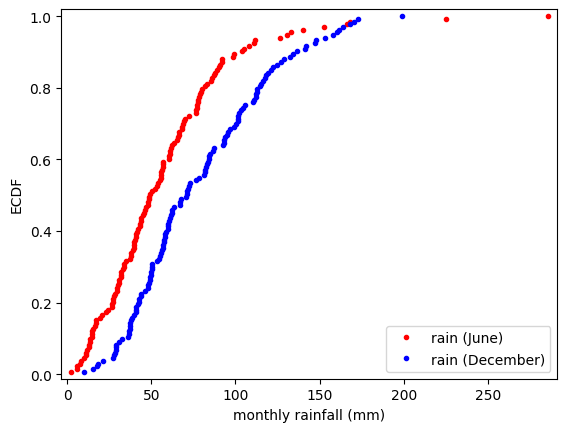

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker=".", linestyle="none", color="red", label="rain (June)")
_ = plt.plot(
    x_2, y_2, marker=".", linestyle="none", color="blue", label="rain (December)"
)

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel("monthly rainfall (mm)")
_ = plt.ylabel("ECDF")
plt.legend()
plt.show()

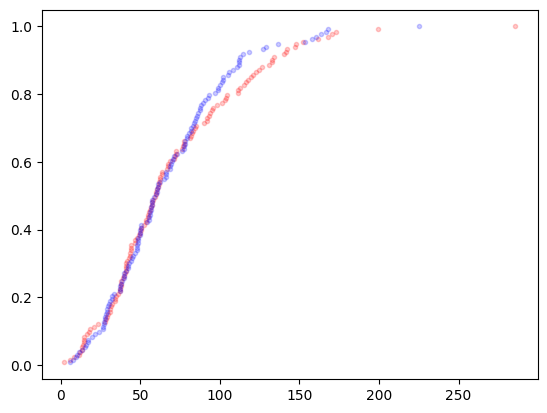

In [5]:
data1 = rain_june
data2 = rain_november

# Concatenate the data sets: data
data = np.concatenate((data1, data2))

# Permute the concatenated array: permuted_data
permuted_data = np.random.permutation(data)

# Split the permuted array into two: perm_sample_1, perm_sample_2
perm_sample_1 = permuted_data[: len(data1)]
perm_sample_2 = permuted_data[len(data1) :]

# Compute ECDFs
x_1, y_1 = ecdf(perm_sample_1)
x_2, y_2 = ecdf(perm_sample_2)

# Plot ECDFs of permutation sample
_ = plt.plot(x_1, y_1, marker=".", linestyle="none", color="red", alpha=0.2)
_ = plt.plot(x_2, y_2, marker=".", linestyle="none", color="blue", alpha=0.2)

## Your turn! (24 points, i.e., 12 pts each)

1. Create an auxiliary function `permutation_sample()` to encapsulate the functionality of lines 4-12 in the example above.
2. Write a `for` loop to generate 50 permutation samples, compute their ECDFs, and plot them.

The plot should look like this: 

![ECDF_permutation_rain](notebook_images/ecdf-permutations.png)

## Solution

### 1. Create an auxiliary function permutation_sample() to encapsulate the functionality of lines 4-12 in the example above.

In [6]:
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[: len(data1)]
    perm_sample_2 = permuted_data[len(data1) :]

    return perm_sample_1, perm_sample_2

### 2. Write a for loop to generate 50 permutation samples, compute their ECDFs, and plot them.

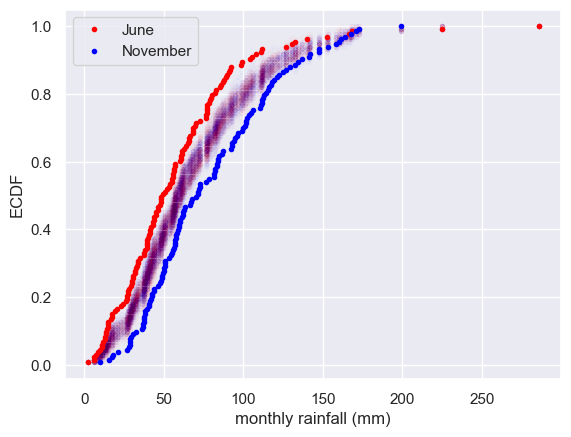

In [7]:
sns.set()

# Plot permutations
for _ in range(50):
    p1, p2 = permutation_sample(rain_june, rain_november)
    for d, c in zip((p1, p2), ("red", "blue")):
        x, y = ecdf(d)
        plt.plot(x, y, marker=".", linestyle="none", color=c, alpha=0.01)

# Plot actual datasets to show how permutations mix them up
x, y = ecdf(rain_june)
plt.plot(x, y, marker=".", linestyle="none", color="red", label="June")
x, y = ecdf(rain_november)
plt.plot(x, y, marker=".", linestyle="none", color="blue", label="November")

plt.xlabel("monthly rainfall (mm)")
plt.ylabel("ECDF")
plt.legend()
plt.show()

-------------------
## Part 2: Test statistics and p-values

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target. (See https://www.nature.com/articles/srep05225 for full paper, if interested.)

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. 

In this part, we will test the hypothesis that the two frogs have the same distribution of impact forces. 

The Python code below reads the data from a CSV file, creates a Pandas data frame, `df`, and makes a bee swarm plot for the data.

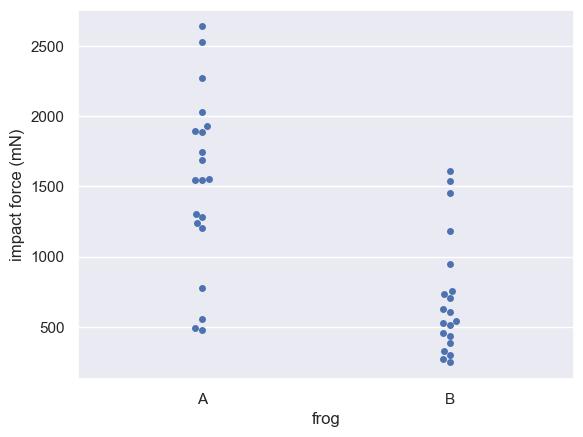

In [8]:
# Read CSV and build dataframe
df = pd.read_csv("data/horned_frog_tongue.csv")

# Make bee swarm plot
_ = sns.swarmplot(x=df["ID"], y=df["impact force (mN)"])

# Label axes
_ = plt.xlabel("frog")
_ = plt.ylabel("impact force (mN)")

# Show the plot
plt.show()

A *permutation replicate* is a single value of a statistic computed from a permutation sample. 

The Python code below shows the `draw_perm_reps()`, which is useful to generate permutation replicates.

The function has call signature `draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, `func` must be a function that takes two arrays as arguments. In most circumstances, `func` will be a function you write yourself.

In [9]:
# Auxiliary functions
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[: len(data1)]
    perm_sample_2 = permuted_data[len(data1) :]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### Testing a difference in means

The code below computes the average strike force of Frog A (1.53 N), and that of Frog B (0.71 N) for a difference of 0.82 N. It is possible the frogs strike with the same force and this observed difference was by chance. 

In [10]:
frog_A = df["ID"] == "A"
frog_B = df["ID"] == "B"
force_a = np.array(df["impact force (mN)"][frog_A]) / 1000
force_b = np.array(df["impact force (mN)"][frog_B]) / 1000
print("The average strike force of Frog A is {:.2f} N".format(force_a.mean()))
print("The average strike force of Frog B is {:.2f} N".format(force_b.mean()))

The average strike force of Frog A is 1.53 N
The average strike force of Frog B is 0.71 N


## Your turn! (25 points)

Write code to compute the probability of getting at least a 0.82 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. You will use a permutation test with a test statistic of the *difference of means* to test this hypothesis.

Hints: 
1. Create a function `diff_of_means()` that takes two arrays as parameters, computes their mean values and returns the difference between the two mean values.
2. Use that function to compute the difference of mean impact force, i.e., call `diff_of_means(force_a, force_b)`.
3. Use function `draw_perm_reps()` to draw 100,000 permutation replicates.
4. Compute and print the p-value.

Important: Don't panic if your p-value is extremely low.

## Solution

The function we will use in the replication (difference of means between two forces).

In [11]:
def diff_of_means(data1, data2):
    """Returns the difference between the means of the input parameters."""
    return np.mean(data1) - np.mean(data2)

In [12]:
# Actual difference, from empirical data
empirical_diff_means = np.mean(force_a) - np.mean(force_b)

# Simulate a large number of experiments, permutating the data (mixing up the
# measurements from both frogs into new datasets)
replicates = draw_perm_reps(force_a, force_b, diff_of_means, 100_000)

# How many experiments are above the empirical measurement
experiments_above_empirical = np.sum(replicates >= empirical_diff_means)

# Ratio of experiments above the empirical measurement -> p-value
p_value = experiments_above_empirical / len(replicates)

In [13]:
print("The empirical difference of means = {}".format(empirical_diff_means))
print("The experimental difference of means = {}".format(np.mean(replicates)))
print(
    "Out of {:,} simulations, {} are >= the empirical difference of means".format(
        len(replicates), experiments_above_empirical
    )
)
print("p-value = {:f}".format(p_value))

The empirical difference of means = 0.8228499999999996
The experimental difference of means = -0.0006048330000000006
Out of 100,000 simulations, 0 are >= the empirical difference of means
p-value = 0.000000


The low p-value is also visible in the boxplot. It shows that most values are well below the empirical difference of means.

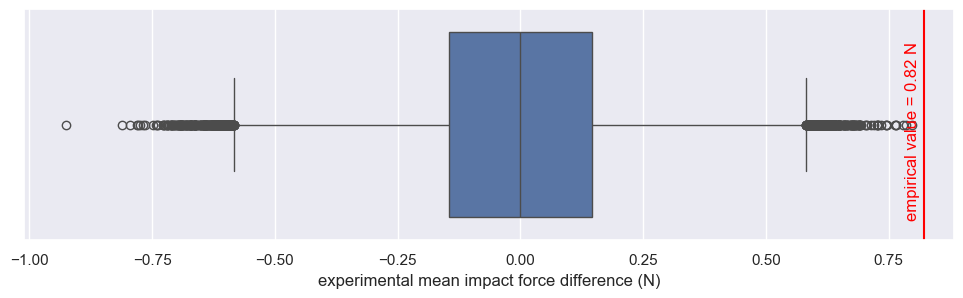

In [14]:
def plot_empirical_mean_diff(plot_function):
    # Increase width to make the outliers stick out visually
    plt.figure(figsize=(12, 3))
    ax = plot_function(x=replicates)
    ax.axvline(empirical_diff_means, 0, 1, color="red")
    ax.text(
        empirical_diff_means - 0.04,
        0.4,
        s="empirical value = {:.2f} N".format(empirical_diff_means),
        rotation=90,
        color="red",
    )
    plt.xlabel("experimental mean impact force difference (N)")
    plt.show()


plot_empirical_mean_diff(sns.boxplot)

## Question 1 (6 points)

1. How do you describe the result of your hypothesis testing based on the p-value calculated above?


## Solution

Our null hypothesis, stated above, is

> the distributions of strike forces for the two frogs are identical

An interpretation of the p-value we calculated (p-value < $10^{-5}$) is that there is less than a 0.001% chance that we would observe the empirical result (0.82 N mean difference between strike forces), assuming the null hypothesis is true (considering the data we have).

Given the low p-value, it is unlikely that the null hypothesis is true. We, therefore, reject the null hypothesis and conclude that the distribution of forces between the two frogs is unlikely to have occurred by chance.

NB: Why all we can say is that the p-value is less than $10^{-5}$ and not a specific value: we ran only 100,000 of the possible experiments. The number of possible experiments is the number of permutations of the combined datasets, a very large number. We don't know what would happen if we ran more experiments (or all of them, if we had enough computing power). Therefore, all we know at this point is that p-value is less than the resolution of our experiments, $10^{-5}$.

The low p-value and the conclusion can  be visualized in the plot of the distribution of the experiment values. It shows that the distribution of the experimental values is well below the empirical value.

The graph is also a clear illustration that "[the evidence we collected make our null hypothesis look ridiculous](https://towardsdatascience.com/the-most-important-idea-in-statistics-8c18d514ad1c)". If our null hypothesis were true, the empirical value would be well within the distribution of the experiment values. The empirical value is way out to the right, far beyond most of the distribution from the experiments, making the null hypothesis "look ridiculous".

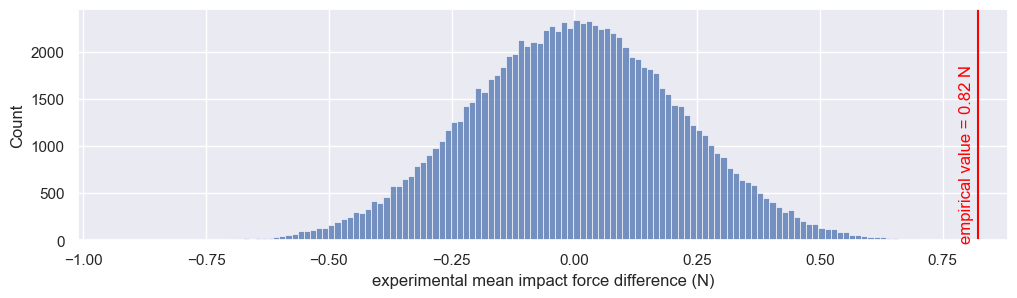

In [15]:
plot_empirical_mean_diff(sns.histplot)

-------------------
## Part 3: Test of correlation

In this part, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the *illiteracy* rate.

The Python code below plots the fertility versus illiteracy and computes the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

In [16]:
df = pd.read_csv("data/female_literacy_fertility.csv")
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


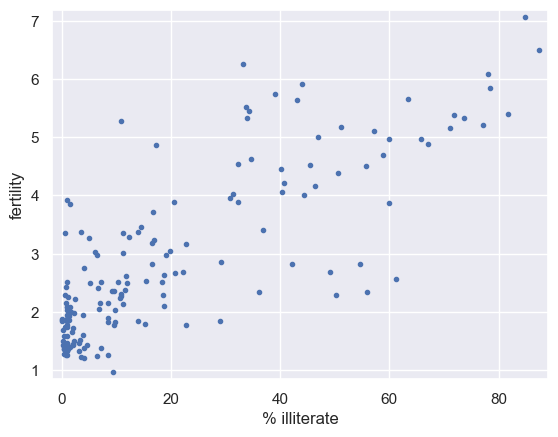

Pearson correlation coefficient between illiteracy and fertility: 0.80413


In [17]:
illiteracy = 100 - df["female literacy"]

fertility = df["fertility"]


def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]


# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker=".", linestyle="none")

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel("% illiterate")
_ = plt.ylabel("fertility")

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(
    "Pearson correlation coefficient between illiteracy and fertility: {:.5f}".format(
        pearson_r(illiteracy, fertility)
    )
)

## Your turn! (25 points)

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. 

You will test this hypothesis. 

To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient (using the `pearson_r()` function above) and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

Hint: use a `for` loop to draw 100,000 permutation replicates and compute the Pearson correlation coefficient for each of them.

Important: Don't panic if your p-value is extremely low.

## Solution

Auxiliary function to create replicates where only one of the datasets is permutated.

In [18]:
def draw_single_perm_reps(to_permutate, use_as_is, func, size=1):
    """Generate multiple replicates where only one of the datasets is
    permutated."""

    replicates = np.empty(size)

    for i in range(size):
        # Permutated dataset
        permutated = np.random.permutation(to_permutate)

        # Compute the test statistic
        replicates[i] = func(use_as_is, permutated)

    return replicates

Run the experiments and calculate results.

In [19]:
replicates = draw_single_perm_reps(illiteracy, fertility, pearson_r, 100_000)

empirical_pearson = pearson_r(fertility, illiteracy)
experiments_above_empirical = np.sum(replicates > empirical_pearson)
p_value = experiments_above_empirical / len(replicates)

Report the results.

In [20]:
print("The empirical Pearson coefficient = {}".format(empirical_pearson))
print("The experimental mean Pearson coefficient = {}".format(np.mean(replicates)))
print(
    "Out of {:,} simulations, {} are > the empirical Pearson coefficient".format(
        len(replicates), experiments_above_empirical
    )
)
print("p-value = {:f}".format(p_value))

The empirical Pearson coefficient = 0.8041324026815349
The experimental mean Pearson coefficient = -0.00022136662717458827
Out of 100,000 simulations, 0 are > the empirical Pearson coefficient
p-value = 0.000000


## Question 2 (6 points)

2. How do you describe the result of your hypothesis testing based on the p-value calculated above?


## Solution

The null hypothesis, stated above, is:

> the fertility of a given country may actually be totally independent of its illiteracy

An interpretation of the p-value we calculated (p-value < $10^{-5}$) is that the chance that we would observe the empirical result (a Pearson coefficient of 0.8 between fertility and illiteracy), assuming the null hypothesis is true (considering the data we have) is less than 0.001%.

Given the low p-value, it is unlikely that the null hypothesis is true. We, therefore, reject the null hypothesis and conclude that the relationship between fertility and illiteracy is unlikely to have occurred by chance.

## Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

### What have you learned from this assignment?

* Create experimental data to calculate p-value
* Think of the p-value in relative terms: "less than a value", instead of a specific value, given that we don't have all the data to assert a specific value (we can't run all the experiments for a large dataset)
* What data to permutate, based on what we are analyzing

### Which parts were the most fun, time-consuming, enlightening, tedious?

Fun

* Visualize the experimental distribution vs. the empirical values.

Time-consuming

* Understand how to interpret p-value without falling into any of the fallacies around it (and I'm still not sure I undrestand it well).

Enlightening

* Cassie Kozyrkov's video and articles
    * The concept of "default action" to explain the null hypothesis.
    * That learning "nothing" is not a problem at all (and should trigger the default action).
    * The differece between frequentists and bayesians (changing actions vs. changing beliefs).

Tedious

* None

### What would you do if you had an additional week to work on this?

* Work on problems where the p-value is not so extreme, so that we have to think how to interpret the results in the absence of conclusive numbers.
* Review Cassie Kozyrkov's articles to the point where I can explain the concepts on my own, as well as she is able to lay them out. I would start with [_Statistics for people in a hurry_](https://towardsdatascience.com/statistics-for-people-in-a-hurry-a9613c0ed0b). If I could explain all concepts in that article wihtout having to refer to it, I'd be happier with my understanding of statistics and hypotehesis testing in particular.